In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [102]:
def load_data():
    data_frame=pd.read_csv("wdbc.csv",header=None)
    data_frame.drop(0,axis=1,inplace=True)
    data_frame[1].replace("B",0,inplace=True)
    data_frame[1].replace("M",1,inplace=True)
    return data_frame

In [103]:
#initializing the weights
def initialize(m):
#m is the no. of training examples    
    weights = np.zeros((m,1))
    bias = 0
    
    return weights , bias

In [104]:
#Sigmoid Fuction
def sigmoid_function(Z):
    return 1/(1 + np.exp(- Z))

In [105]:
#Calculating the Cost and gradients
def training(X, Y, weights, bias):
    
    m = X.shape[1] #Number of training examples
    #print(Y.shape)

    #calculating the cost, Forward Propagation
    Z = np.dot(weights.T, X) + bias;    
    sigmoid = sigmoid_function(Z)
    cost= -(1/m) * np.sum(Y * np.log(sigmoid) + (1-Y) * np.log(1-sigmoid))
    
    #calculating the gradients to minimize the cost function , Backward Propagation
    derived_weights = (1/m)* np.dot(X, (sigmoid-Y).T)
    derived_bias = (1/m)* np.sum(sigmoid-Y)
    
    #print('weights',dw.shape)
    
    gradients = {"dw" : derived_weights, "db" : derived_bias}
    
    return gradients, cost

In [106]:
def optimize(X, Y, weights, bias, epochs, alpha):
    
    costs=[]
    predictions=[]
    
    for i in range(epochs):
 
        gradients, cost = training(X, Y, weights, bias)
        
        derived_weights = gradients["dw"]
        derived_bias = gradients["db"]
        
        weights = weights - alpha * derived_weights
        bias = bias - alpha * derived_bias
        
        #Storing the cost at interval of every 100 iterations
        if i % 10 == 0:
            costs.append(cost)
            print("cost after %i iteration : %f" % (i, cost))
        
        prediction = predict(X, weights, bias)
        predictions.append(100 - np.mean(np.abs(prediction - Y.T)) * 100)
        
            
    w = {"w":weights, "b":bias}
    gradients = {"dw":derived_weights, "db":derived_bias}
    
    return w, gradients, costs, predictions

In [107]:
def predict(X, weights, bias):
    
    m = X.shape[1] #Number of training examples
    
    y_prediction =  np.zeros((1,m))
    
    weights = weights.reshape(X.shape[0], 1)
    
    sigmoid=sigmoid_function(np.dot(weights.T, X)+bias)
    
    #print(sigmoid . round(0.5))
    
    for i in range(sigmoid.shape[1]):
        
        if(sigmoid[0,i]<0.5):
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1           
    
    return y_prediction

In [108]:
def logistic_regression(Xtrain, Ytrain, epochs, alpha):
    
    no_of_dimensions = Xtrain.shape[0] #Number of features
    
    weights,bias = initialize(no_of_dimensions)
    
    parameters, gradients, costs, predictions = optimize(Xtrain, Ytrain, weights, bias, epochs, alpha) 
    
    weights = parameters["w"]
    bias = parameters["b"]
    
    d={"w":weights, "b":bias, "costs": costs, "accuracy": predictions}
    
    return d

In [109]:
input_data=load_data()

#Splitting the data into train, test and validation sets
train_test , test= train_test_split(input_data , test_size = 0.1 , random_state = 45)
train , validate= train_test_split(train_test , test_size = (1/9) , random_state = 45)

#Assigning the columns to dependent and independent vectors. 
x_train = train.loc[:, 1:31]
y_train = train.loc[:, 1]
x_val   = validate.loc[:, 1:31]
y_val   = validate.loc[:, 1]
x_test  = test.loc[:, 1:31]
y_test  = test.loc[:, 1]

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_val   = np.asarray(x_val)
y_val   = np.asarray(y_val)
x_test  = np.asarray(x_test)
y_test  = np.asarray(y_test)


# Feature Scaling and Normalizing the data for optimum results
mean_train  = np.mean(x_train, axis = 0)
std_train   = np.std(x_train, axis = 0)
mean_val    = np.mean(x_val, axis = 0)
std_val     = np.std(x_val, axis = 0)
mean_test   = np.mean(x_test, axis = 0)
std_test    = np.std(x_test, axis = 0)

x_train = (x_train - mean_train) / std_train
x_val = (x_val - mean_val) / std_val
x_test = (x_test - mean_test) / std_test


cost after 0 iteration : 0.693147
cost after 10 iteration : 0.465396
cost after 20 iteration : 0.370997
cost after 30 iteration : 0.319231
cost after 40 iteration : 0.285663
cost after 50 iteration : 0.261542
cost after 60 iteration : 0.243001
cost after 70 iteration : 0.228068
cost after 80 iteration : 0.215627
cost after 90 iteration : 0.205000
cost after 100 iteration : 0.195744
cost after 110 iteration : 0.187560
cost after 120 iteration : 0.180235
cost after 130 iteration : 0.173613
cost after 140 iteration : 0.167579
cost after 150 iteration : 0.162041
cost after 160 iteration : 0.156930
cost after 170 iteration : 0.152189
cost after 180 iteration : 0.147773
cost after 190 iteration : 0.143642
cost after 200 iteration : 0.139766
cost after 210 iteration : 0.136119
cost after 220 iteration : 0.132678
cost after 230 iteration : 0.129424
cost after 240 iteration : 0.126339
cost after 250 iteration : 0.123410
cost after 260 iteration : 0.120624
cost after 270 iteration : 0.117969
cos

Text(0,0.5,'Cost')

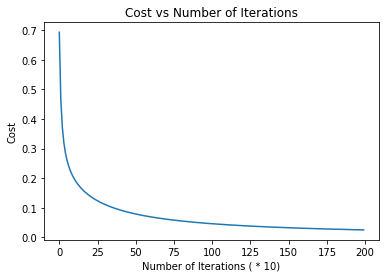

In [118]:
regression_model = logistic_regression(x_val.T, y_val.T, epochs=2000,alpha = 0.017)

costs=regression_model["costs"]
weights=regression_model["w"]
bias=regression_model["b"]
Accuracy=regression_model["accuracy"]
#print(costs)

#Drawing the plot between cost and number of iterations
plt.plot(costs)
plt.title("Cost vs Number of Iterations")
plt.xlabel("Number of Iterations ( * 10)")
plt.ylabel("Cost")


Text(0,0.5,'Accuracy')

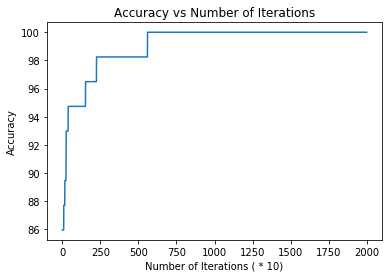

In [119]:
#Drawing the plot between cost and number of iterations
plt.plot(Accuracy)
#plt.title("Predtictions vs Number of Iterations")
##Drawing the plot between cost and number of iterations
#plt.plot(costs)
plt.title("Accuracy vs Number of Iterations")
plt.xlabel("Number of Iterations ( * 10)")
plt.ylabel("Accuracy")

In [120]:
prediction_train = predict(x_train.T, weights, bias)
#prediction_test = predict(x_test.T, weights, bias)
#prediction_val = predict(x_val.T, weights,bias)

#print("\n Train accuracy: {} %".format(100 - np.mean(np.abs(prediction_train - y_train.T)) * 100))
#print("\n Validation Data accuracy: {} %".format(100 - np.mean(np.abs(prediction_val - y_val.T)) * 100)) 
#print("\nTest accuracy: {} %".format(100 - np.mean(np.abs(prediction_test - y_test.T)) * 100))

accuracy_numerator=0
accuracy_denominator=0
precision_numerator=0
precision_denominator=0
recall_numerator=0
recall_denominator=0

for i in range (x_test.shape[0]):
    x= str(prediction_test.T[i])
    if(str(y_test[i]) == x[1]):
        accuracy_numerator+=1
    accuracy_denominator+=1
    if(x[1] == '1'):
        precision_denominator+=1
        if(y_test[i] == 1):
            precision_numerator+=1
    
    if(y_test[i] == 1):
        recall_denominator+=1
        if(x[1] == '1'):
            recall_numerator+=1

accuracy = accuracy_numerator / accuracy_denominator *100
precision = precision_numerator / precision_denominator *100
recall = recall_numerator / recall_denominator *100
fmeasure = 2 * (recall *precision) / (recall + precision)

print('Test Data Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('f_measure: ', fmeasure)

Test Data Accuracy:  96.49122807017544
Precision:  93.75
Recall:  93.75
f_measure:  93.75
